### 대선자료 시각화

In [1]:
import pandas as pd

In [2]:
election = pd.read_csv('../Data/21대_대통령선거.csv')
election

,광역시도,시군구,선거인수,투표수,이재명,김문수,이준석
0,서울특별시,종로구,125901,99261,47735,39574,9326
1,서울특별시,중구,110181,87166,40482,36302,8450
2,서울특별시,용산구,183614,143813,58705,67927,13794
3,서울특별시,성동구,244536,196282,88028,84043,20217
4,서울특별시,광진구,301007,239807,114304,94752,25469
...,...,...,...,...,...,...,...
248,경상남도,산청군,30968,24668,7478,15548,1130
249,경상남도,거창군,52316,41373,12623,25259,2640
250,경상남도,합천군,37329,28935,7001,20132,1188
251,제주특별자치도,제주시,409912,306685,169119,102224,27522


In [3]:
election.info()

<class 'pandas.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   광역시도    253 non-null    str  
 1   시군구     253 non-null    str  
 2   선거인수    253 non-null    int64
 3   투표수     253 non-null    int64
 4   이재명     253 non-null    int64
 5   김문수     253 non-null    int64
 6   이준석     253 non-null    int64
dtypes: int64(5), str(2)
memory usage: 14.0 KB


In [4]:
# 기본 통계량 확인
election.describe()  # 시각화는 가능 분석은 불가능 => 중앙값, 평균, min, max 차이가 큼.

,선거인수,투표수,이재명,김문수,이준석
count,253.000000,253.000000,253.000000,253.000000,253.000000
mean,175461.940711,139274.691700,68330.090909,56899.758893,11531.711462
std,135904.618790,108051.027945,57651.478345,47983.374559,10570.967359
min,8412.000000,6716.000000,1814.000000,1584.000000,454.000000
25%,50638.000000,38724.000000,18860.000000,16673.000000,2045.000000
50%,153669.000000,114891.000000,55305.000000,45028.000000,9057.000000
75%,263759.000000,216261.000000,106747.000000,90041.000000,18088.000000
max,617951.000000,484777.000000,261539.000000,246446.000000,46194.000000


In [5]:
election.head()

,광역시도,시군구,선거인수,투표수,이재명,김문수,이준석
0,서울특별시,종로구,125901,99261,47735,39574,9326
1,서울특별시,중구,110181,87166,40482,36302,8450
2,서울특별시,용산구,183614,143813,58705,67927,13794
3,서울특별시,성동구,244536,196282,88028,84043,20217
4,서울특별시,광진구,301007,239807,114304,94752,25469


In [6]:
election['electionSum'] = election[['이재명', '김문수', '이준석']].sum(axis='columns')    # columns = (axis = 1) row = 0

election.head()

,광역시도,시군구,선거인수,투표수,이재명,김문수,이준석,electionSum
0,서울특별시,종로구,125901,99261,47735,39574,9326,96635
1,서울특별시,중구,110181,87166,40482,36302,8450,85234
2,서울특별시,용산구,183614,143813,58705,67927,13794,140426
3,서울특별시,성동구,244536,196282,88028,84043,20217,192288
4,서울특별시,광진구,301007,239807,114304,94752,25469,234525


In [7]:
# electionRatio = electionSum / 투표수 * 100의 결과를 반올림 2자리로 정리한다.

election['electionRatio'] = round(election.electionSum / election.투표수 * 100, 2)
election.head()


,광역시도,시군구,선거인수,투표수,이재명,김문수,이준석,electionSum,electionRatio
0,서울특별시,종로구,125901,99261,47735,39574,9326,96635,97.35
1,서울특별시,중구,110181,87166,40482,36302,8450,85234,97.78
2,서울특별시,용산구,183614,143813,58705,67927,13794,140426,97.64
3,서울특별시,성동구,244536,196282,88028,84043,20217,192288,97.97
4,서울특별시,광진구,301007,239807,114304,94752,25469,234525,97.80


In [8]:
# 3후보의 투표율이 가장 높은 지역?
election[election.electionRatio == election.electionRatio.max()]


,광역시도,시군구,선거인수,투표수,이재명,김문수,이준석,electionSum,electionRatio
49,대구광역시,군위군,21402,17745,2616,14246,674,17536,98.82


In [9]:
# 투표수가 제일 많은 지역?

election[election.투표수 == election.투표수.max()]

,광역시도,시군구,선거인수,투표수,이재명,김문수,이준석,electionSum,electionRatio
101,경기도,남양주시,617951,484777,261539,179144,36668,477351,98.47


In [10]:
election[election.투표수 == election.투표수.min()]

,광역시도,시군구,선거인수,투표수,이재명,김문수,이준석,electionSum,electionRatio
208,경상북도,울릉군,8412,6716,1814,4351,454,6619,98.56


In [11]:
election_p = election[['이재명', '김문수', '이준석']].sum(axis='rows')
election_p

이재명    17287513
김문수    14395639
이준석     2917523
dtype: int64

In [12]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

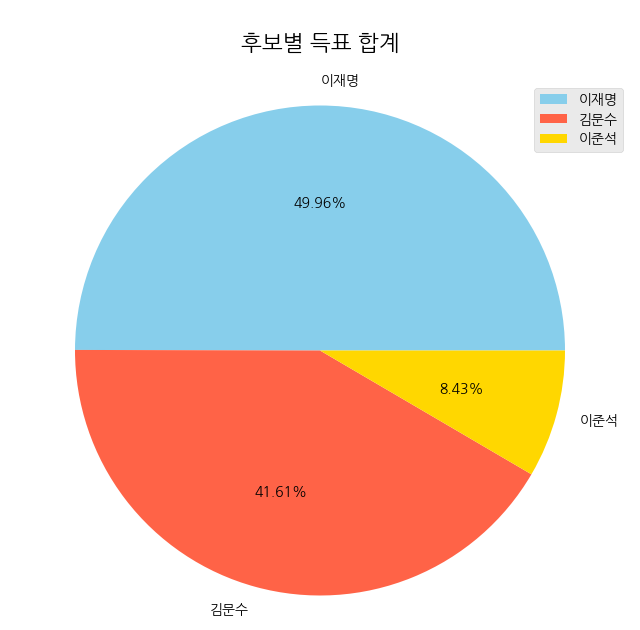

In [13]:
plt.style.use('ggplot')


election_p.plot(
    kind = 'pie',
    figsize = (8,7),
    autopct = '%.2f%%',
    # startangle =//
    colors = ['skyblue', 'tomato', 'gold'],

)

plt.title('\n후보별 득표 합계\n', fontsize=16)
plt.axis('equal')
plt.legend(labels = election_p.index, loc='upper right')


plt.show()

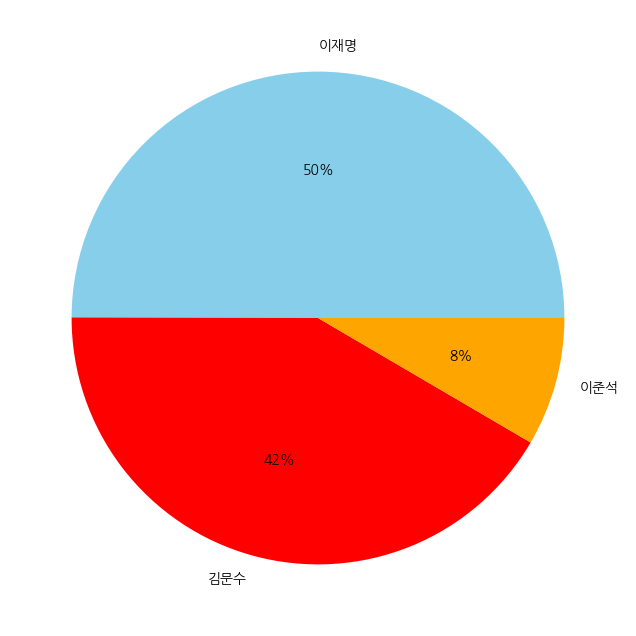

In [14]:
election[['이재명', '김문수', '이준석']].sum(axis='rows').plot(
    kind = 'pie',
    autopct = "%.f%%",
    figsize = (8,8),
    colors = ['skyblue', 'red', 'orange']
)
plt.show()

----
#### 광역시별 투표율을 Pie Chart로 표현하기

In [15]:
election


,광역시도,시군구,선거인수,투표수,이재명,김문수,이준석,electionSum,electionRatio
0,서울특별시,종로구,125901,99261,47735,39574,9326,96635,97.35
1,서울특별시,중구,110181,87166,40482,36302,8450,85234,97.78
2,서울특별시,용산구,183614,143813,58705,67927,13794,140426,97.64
3,서울특별시,성동구,244536,196282,88028,84043,20217,192288,97.97
4,서울특별시,광진구,301007,239807,114304,94752,25469,234525,97.80
...,...,...,...,...,...,...,...,...,...
248,경상남도,산청군,30968,24668,7478,15548,1130,24156,97.92
249,경상남도,거창군,52316,41373,12623,25259,2640,40522,97.94
250,경상남도,합천군,37329,28935,7001,20132,1188,28321,97.88
251,제주특별자치도,제주시,409912,306685,169119,102224,27522,298865,97.45


In [16]:
# 광역시도별로 투표수의 합을 구하자
elec_sum = \
    election.pivot_table(
        '투표수',
        index = '광역시도',
        aggfunc = 'sum'
    )
elec_sum.head()

,투표수
광역시도,
강원특별자치도,1029407
경기도,9297448
경상남도,2179989
경상북도,1747364
광주광역시,1002149


In [17]:
# 투표수별 내림차순으로 정렬
elec_sum_order = \
    elec_sum.sort_values(
        by = '투표수',
        ascending=False
    )
elec_sum_order.head()

,투표수
광역시도,
경기도,9297448
서울특별시,6641606
부산광역시,2245755
경상남도,2179989
인천광역시,2035355


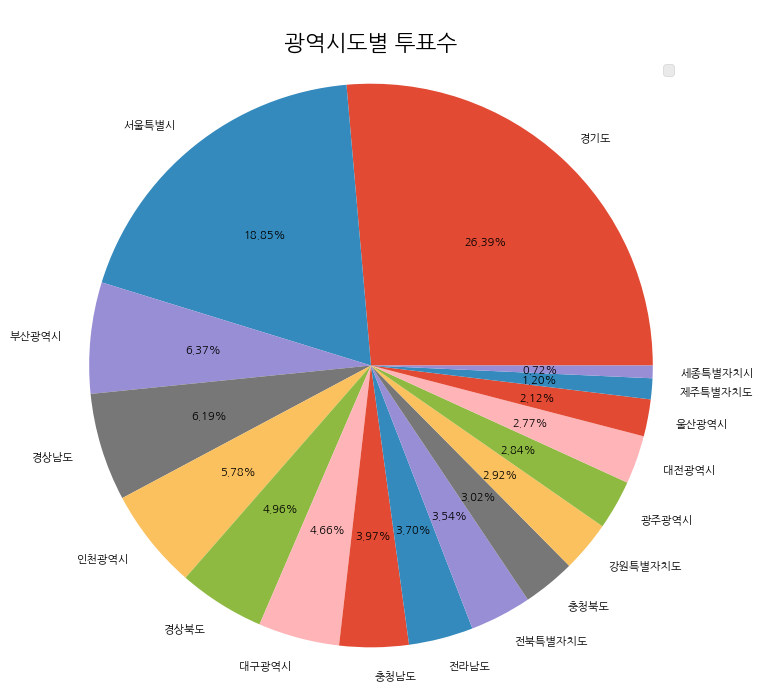

In [18]:
plt.style.use('ggplot')

# 차트 그릴때에는 Series 로 해야하지만 subplot을 넣으면 가능인듯.
# elec_sum_order.투표수.plot(
#     kind = 'pie'
# )
plt.rcParams['font.size'] = 10


elec_sum_order.plot(
    subplots=True,
    kind = 'pie',
    figsize = (8,8),
    autopct = '%.2f%%',
    fontsize = 8,
)

plt.title('\n광역시도별 투표수', fontsize=16)
plt.axis('equal')
plt.legend(labels = '')


plt.show()

In [58]:
# 경기도, 서울, 인천이 전체 투표수의 몇 퍼센트?

elec_sum_order['합계'] = elec_sum_order.sum(axis='columns')
# elec_sum_order[:,['경기도','서울특별시','인천광역시']]
elec_sum_order


,투표수,합계
광역시도,,
경기도,9297448,9297448.0
서울특별시,6641606,6641606.0
부산광역시,2245755,2245755.0
경상남도,2179989,2179989.0
인천광역시,2035355,2035355.0
경상북도,1747364,1747364.0
대구광역시,1643051,1643051.0
충청남도,1397521,1397521.0
전라남도,1303365,1303365.0


---
#### 이재명 후보의 광역시도별 득표율을 Pie Chart로

In [67]:
election_ljm = \
    election.pivot_table(
        ['이재명', '이준석','김문수'],
        index = '광역시도',
        aggfunc='sum'
    )
election_ljm

,김문수,이재명,이준석
광역시도,,,
강원특별자치도,483360,449161,78704
경기도,3504620,4821148,816435
경상남도,1123843,851733,161579
경상북도,1159594,442683,116094
광주광역시,79937,844682,62104
대구광역시,1103913,379130,135376
대전광역시,393549,470321,94724
부산광역시,1146238,895213,168473
서울특별시,2738405,3105459,655346


In [36]:
elec_ljm = \
    election_ljm.sort_values(
        by = '이재명',
        ascending=False
    )
elec_ljm.head()

,이재명
광역시도,
경기도,4821148
서울특별시,3105459
전라남도,1111941
인천광역시,1044295
전북특별자치도,1023272


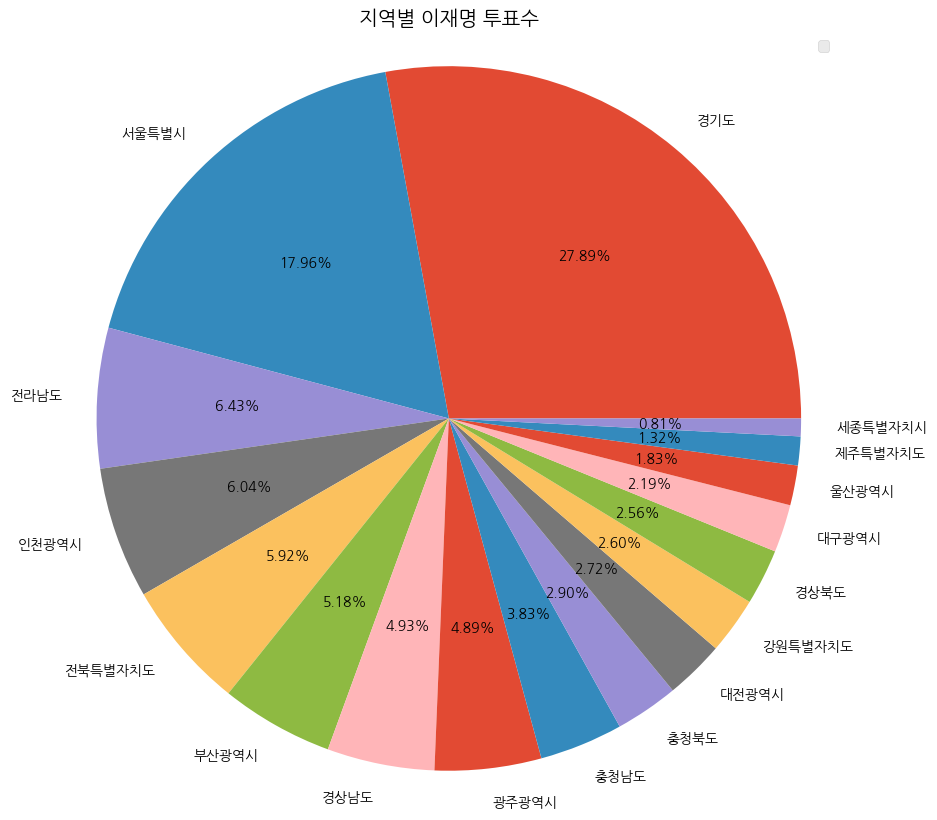

In [49]:
elec_ljm.plot(
    subplots=True,
    kind = 'pie',
    figsize=(10,10),
    autopct = '%.2f%%',


)
plt.title('지역별 이재명 투표수')
plt.legend(labels = '')
plt.axis('equal')

plt.show()

KeyError: '이재명'

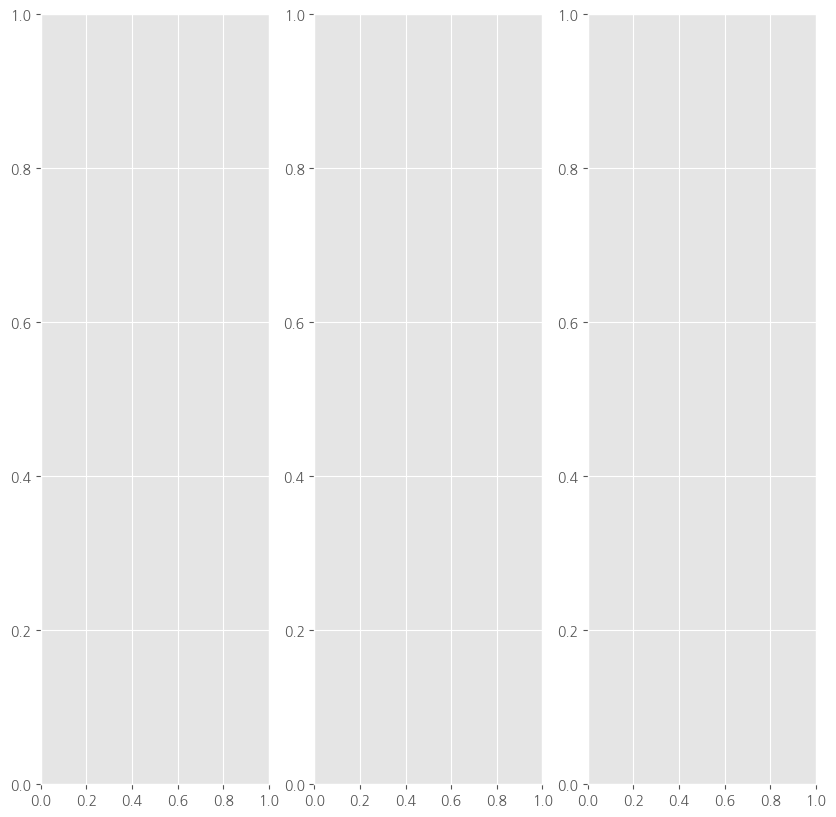

In [71]:

plt.style.use('ggplot')

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.plot(
    election_ljm.loc['이재명'],
    kind = 'pie',
    figsize=(10,10),
    autopct = '%.2f%%',
)
ax2.plot(
    elec_ljm,
    kind = 'pie',
    figsize=(10,10),
    autopct = '%.2f%%',
)
ax3.plot(
    elec_ljm,
    kind = 'pie',
    figsize=(10,10),
    autopct = '%.2f%%',
)

plt.show()

---
#### 이재명 후보 서울 득표 Top5만 Pie Chart

In [153]:
e1 = \
    election[['광역시도', '시군구', '이재명']]  
e1


,광역시도,시군구,이재명
0,서울특별시,종로구,47735
1,서울특별시,중구,40482
2,서울특별시,용산구,58705
3,서울특별시,성동구,88028
4,서울특별시,광진구,114304
...,...,...,...
248,경상남도,산청군,7478
249,경상남도,거창군,12623
250,경상남도,합천군,7001
251,제주특별자치도,제주시,169119


In [159]:
e2 = \
    e1.iloc[0:25]
e2

,광역시도,시군구,이재명
0,서울특별시,종로구,47735
1,서울특별시,중구,40482
2,서울특별시,용산구,58705
3,서울특별시,성동구,88028
4,서울특별시,광진구,114304
5,서울특별시,동대문구,117631
6,서울특별시,중랑구,137420
7,서울특별시,성북구,152624
8,서울특별시,강북구,105780
9,서울특별시,도봉구,110614


In [211]:
e3 = \
    e2.sort_values(
        '이재명',
        ascending=False
    )

In [212]:
e4 = e3.iloc[0:5,:]
e4

,광역시도,시군구,이재명
15,서울특별시,강서구,196256
23,서울특별시,송파구,191678
10,서울특별시,노원구,176604
11,서울특별시,은평구,171417
20,서울특별시,관악구,171149


In [220]:
# e3.loc['합계'] = e3.loc[6::, :].이재명.sum(axis=0)
e4 = e3.iloc[0:5,:]
e4
e4.loc['합계']  = e3.loc[6::, :].이재명.sum(axis=0)
e4


,광역시도,시군구,이재명
15,서울특별시,강서구,196256
23,서울특별시,송파구,191678
10,서울특별시,노원구,176604
11,서울특별시,은평구,171417
20,서울특별시,관악구,171149
합계,1602366,1602366,1602366


In [354]:
e4.set_index(
    '시군구',
    inplace=True
)

KeyError: "None of ['시군구'] are in the columns"

In [246]:
# e4.drop(
#     '1602366',
#     axis= 'columns',
#     inplace=True
# )

e4.rename(
    index = {1602366:'합계'}
    )
e4

,이재명
시군구,
강서구,196256
송파구,191678
노원구,176604
은평구,171417
관악구,171149
1602366,1602366
1602366,합계


In [247]:
196256/1602366*100

12.247888434976778

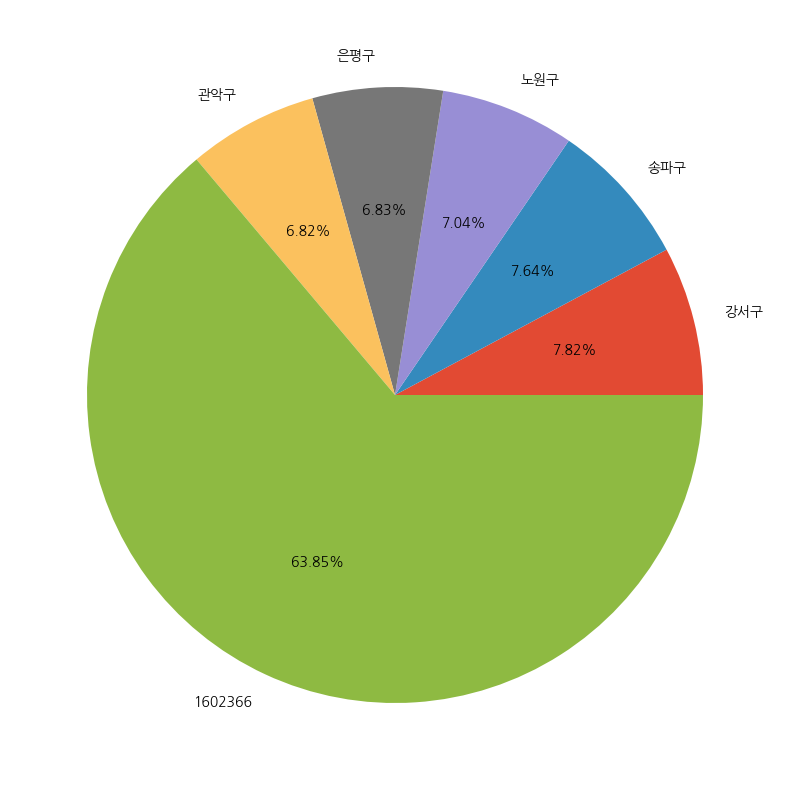

In [226]:
e4.이재명.plot(
    subplots=True,
    kind = 'pie',
    figsize=(10,10),
    autopct = '%.2f%%'
)




plt.show()

---
#### 대선주자 출생지별 득표율 분석
: 이재명 후보의 출생지는 경상북도 안동시

In [290]:
election_ad = election[election['시군구']=='안동시'][['시군구','투표수', '이재명','김문수', '이준석']]

In [291]:
election_ad['기타'] = election_ad['투표수'] - election_ad[['이재명','김문수', '이준석']].sum(axis = 1)

In [302]:
elec_ad = election_ad[['이재명', '김문수', '이준석', '기타']].T

In [306]:

elec_ad.columns = ['득표수']
elec_ad 

,득표수
이재명,33560
김문수,65739
이준석,7050
기타,1867


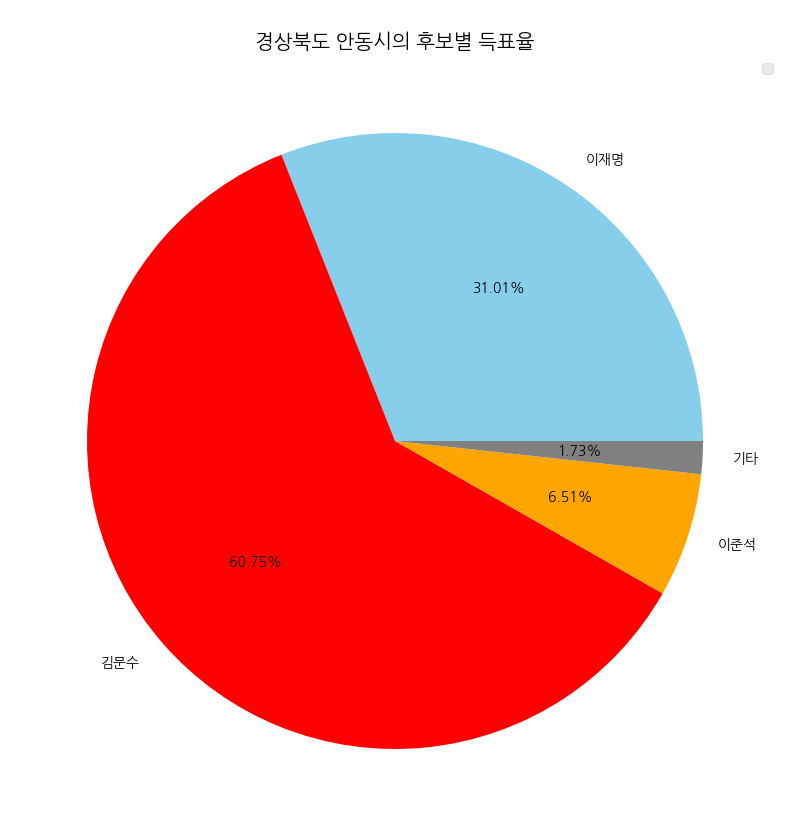

In [335]:
elec_ad.plot(
    subplots=True,
    kind = 'pie',
    figsize=(10,10),
    autopct = '%.2f%%',
    colors = ['skyblue', 'red', 'orange', 'grey']
)
plt.title('\n경상북도 안동시의 후보별 득표율')
plt.legend(labels = '')


plt.show()

In [332]:

# 함수 만들어보기

election['기타'] = election['투표수'] - election[['이재명', '김문수', '이준석']].sum(axis=1)
election

def electionfunc(state, name):



,광역시도,시군구,선거인수,투표수,이재명,김문수,이준석,electionSum,electionRatio,기타
0,서울특별시,종로구,125901,99261,47735,39574,9326,96635,97.35,2626
1,서울특별시,중구,110181,87166,40482,36302,8450,85234,97.78,1932
2,서울특별시,용산구,183614,143813,58705,67927,13794,140426,97.64,3387
3,서울특별시,성동구,244536,196282,88028,84043,20217,192288,97.97,3994
4,서울특별시,광진구,301007,239807,114304,94752,25469,234525,97.80,5282
...,...,...,...,...,...,...,...,...,...,...
248,경상남도,산청군,30968,24668,7478,15548,1130,24156,97.92,512
249,경상남도,거창군,52316,41373,12623,25259,2640,40522,97.94,851
250,경상남도,합천군,37329,28935,7001,20132,1188,28321,97.88,614
251,제주특별자치도,제주시,409912,306685,169119,102224,27522,298865,97.45,7820


---
#### 투표수가 가장 많은 4지역(광역시도)의 각 후보별 득표수를 막대그래프로 표현하기

In [416]:
election.head()

,광역시도,시군구,선거인수,투표수,이재명,김문수,이준석,electionSum,electionRatio,기타
0,서울특별시,종로구,125901,99261,47735,39574,9326,96635,97.35,2626
1,서울특별시,중구,110181,87166,40482,36302,8450,85234,97.78,1932
2,서울특별시,용산구,183614,143813,58705,67927,13794,140426,97.64,3387
3,서울특별시,성동구,244536,196282,88028,84043,20217,192288,97.97,3994
4,서울특별시,광진구,301007,239807,114304,94752,25469,234525,97.80,5282


In [420]:
election_state = \
    election.pivot_table(
        index = '광역시도',
        values = ['이재명', '김문수',  '이준석', '투표수'],
        aggfunc = 'sum',
    )
election_state



,김문수,이재명,이준석,투표수
광역시도,,,,
강원특별자치도,483360,449161,78704,1029407
경기도,3504620,4821148,816435,9297448
경상남도,1123843,851733,161579,2179989
경상북도,1159594,442683,116094,1747364
광주광역시,79937,844682,62104,1002149
대구광역시,1103913,379130,135376,1643051
대전광역시,393549,470321,94724,977609
부산광역시,1146238,895213,168473,2245755
서울특별시,2738405,3105459,655346,6641606


In [438]:
elec_state = \
    election_state.sort_values(
        by = '투표수',
        ascending=False
    )
elec_state

,김문수,이재명,이준석,투표수
광역시도,,,,
경기도,3504620,4821148,816435,9297448
서울특별시,2738405,3105459,655346,6641606
부산광역시,1146238,895213,168473,2245755
경상남도,1123843,851733,161579,2179989
인천광역시,776952,1044295,176739,2035355
경상북도,1159594,442683,116094,1747364
대구광역시,1103913,379130,135376,1643051
충청남도,600108,661316,111092,1397521
전라남도,110624,1111941,60822,1303365


In [450]:
elec_state1 = elec_state.iloc[0:4].drop('투표수', axis = 'columns')
elec_state1

,김문수,이재명,이준석
광역시도,,,
경기도,3504620,4821148,816435
서울특별시,2738405,3105459,655346
부산광역시,1146238,895213,168473
경상남도,1123843,851733,161579


In [469]:
# elec_state1.iloc[:,0:3]
elec_state2 = elec_state1[['이재명', '김문수', '이준석']]

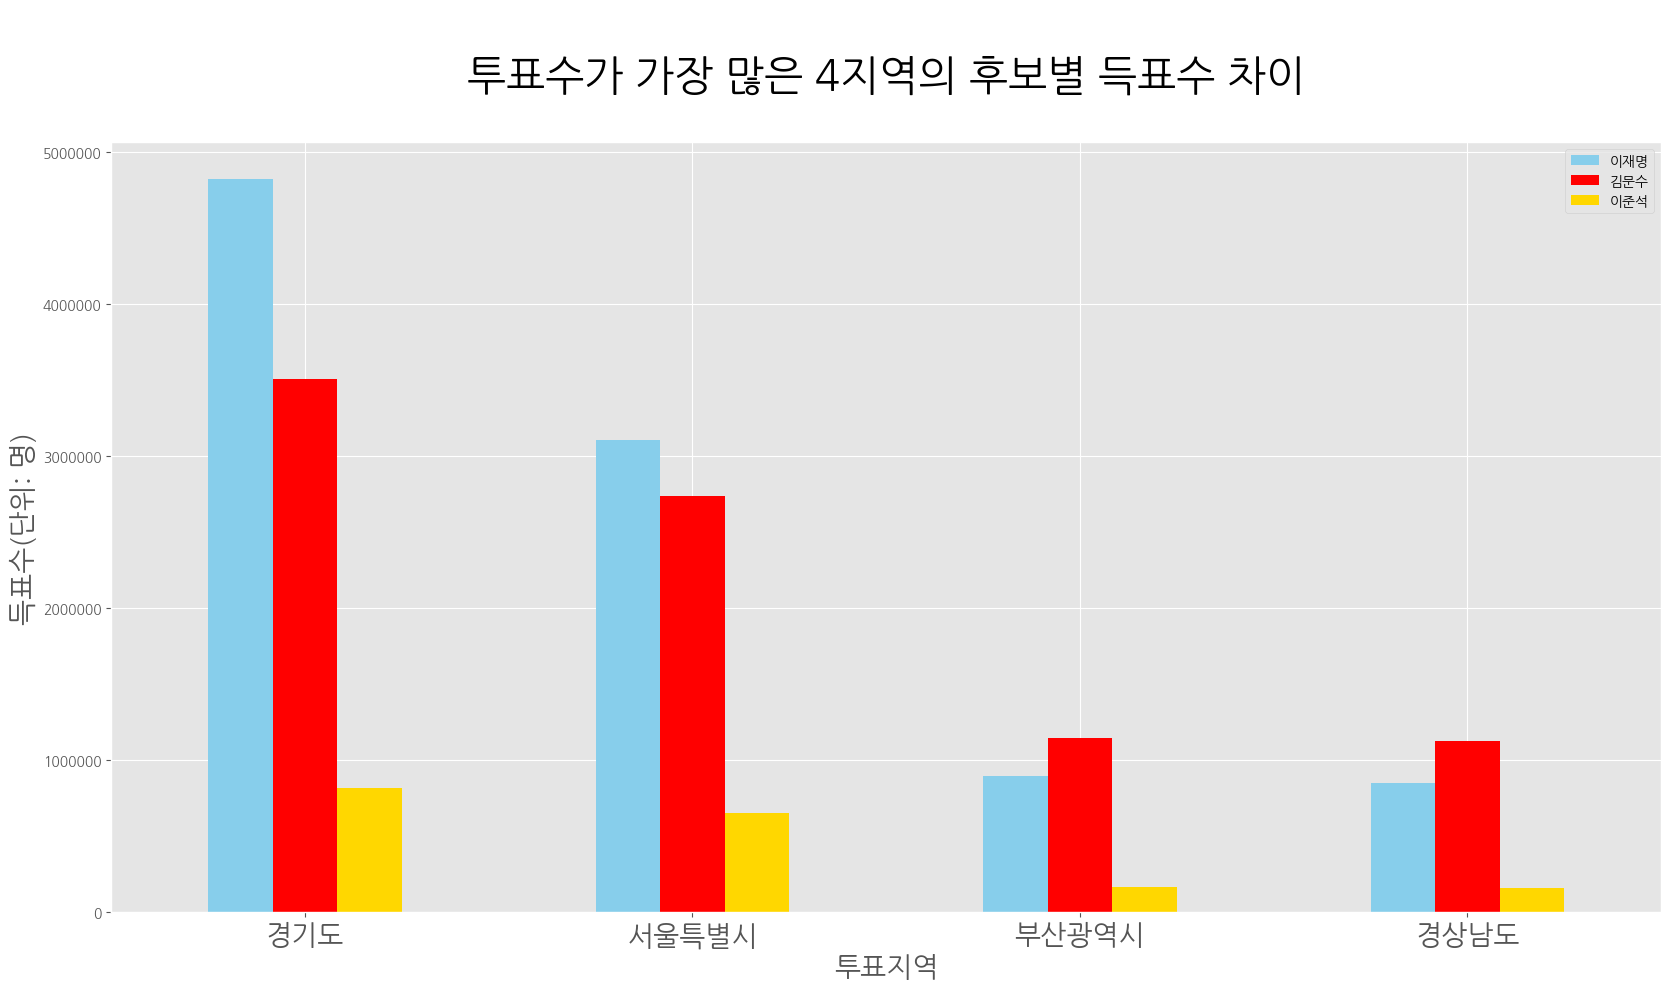

In [476]:
plt.style.use('ggplot')

elec_state2.plot(
    kind = 'bar',
    figsize = (20, 10),
    color = ['skyblue', 'red','gold']
)

# plt.xticks(rotate=)
plt.title('\n투표수가 가장 많은 4지역의 후보별 득표수 차이\n', size = 30)
plt.xlabel('투표지역', size = 20)
plt.ylabel('득표수(단위: 명)', size = 20)
plt.xticks(rotation = 0, size = 20)

plt.ticklabel_format(axis='y',useOffset=False, style='plain') # Y축의 지수표시를 막기
plt.show()